In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)
import pickle
import seaborn as sns
import scipy
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

In [2]:
size=17
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.serif': 'Times',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': size,
    'axes.labelsize':size,
    'axes.titlesize':size,
    'figure.titlesize':size,
    'xtick.labelsize':size,
    'ytick.labelsize':size,
    'legend.fontsize':size,
})

In [3]:
alpha = 0.1
seed_cluster_min = 0
nb_seed_cluster = 25
seeds = np.arange(seed_cluster_min,nb_seed_cluster)

In [4]:
x = np.linspace(0,1,10000)
dx = x[1]-x[0]
y = scipy.stats.norm.ppf(x, 0, 1) 
dydx = np.gradient(y, dx)
dydxdx = np.gradient(dydx, dx)
qseconde = dydxdx[np.argmin(np.abs(x-(1-alpha/2)))]/4

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:1089: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:1096: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


In [5]:
colors_blindness = sns.color_palette("colorblind")
colors = [colors_blindness[7],colors_blindness[4],colors_blindness[6],colors_blindness[8],
          colors_blindness[1],colors_blindness[9],colors_blindness[0],colors_blindness[2]]

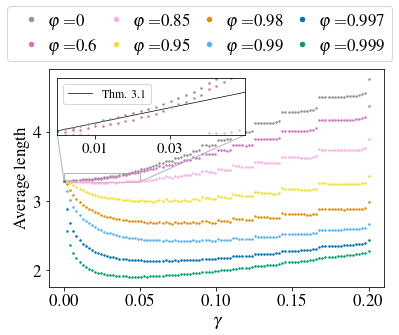

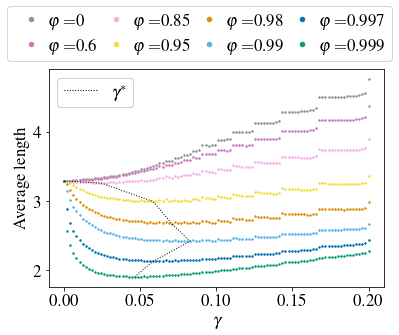

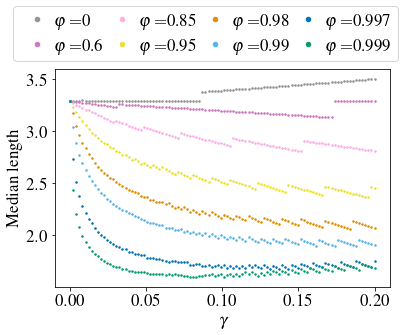

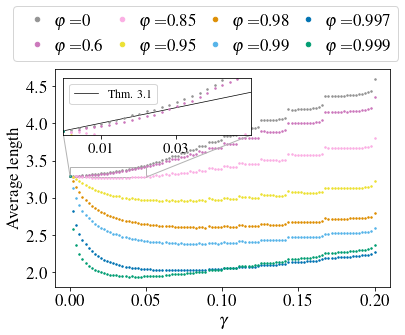

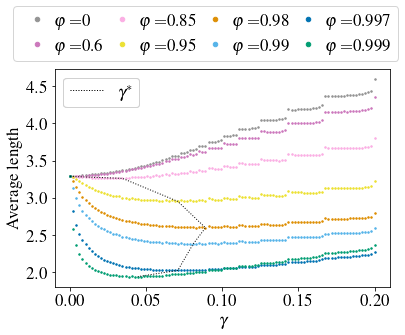

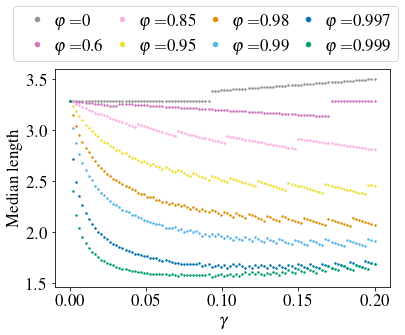

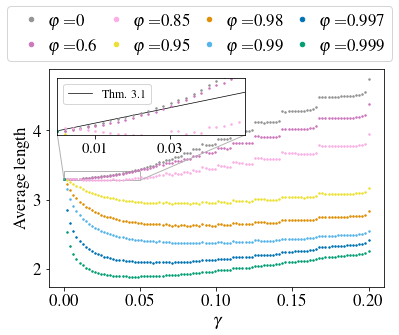

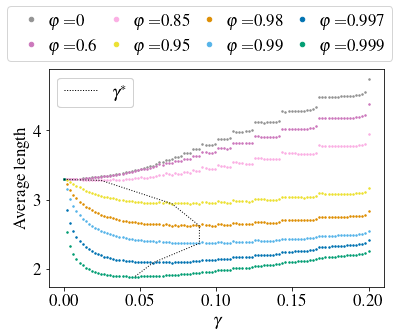

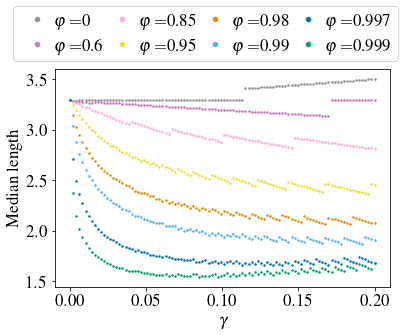

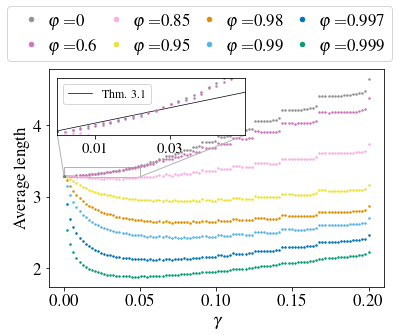

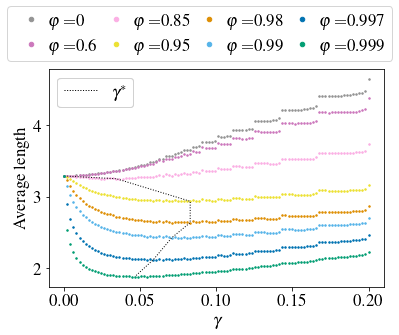

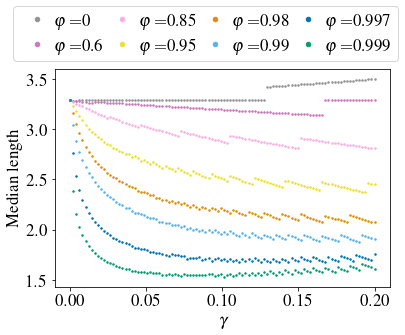

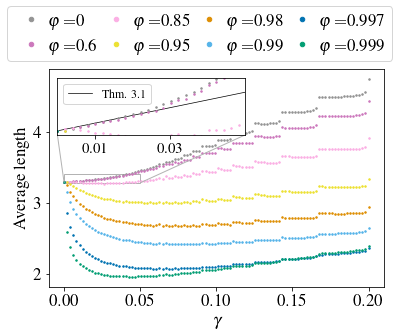

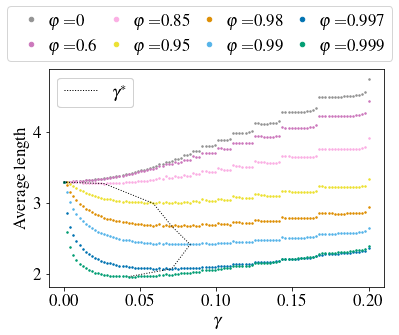

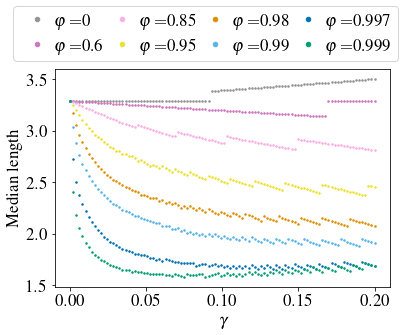

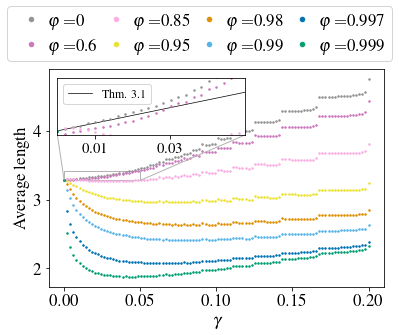

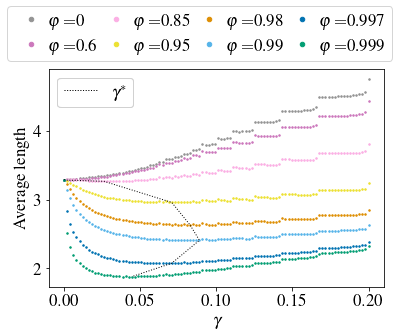

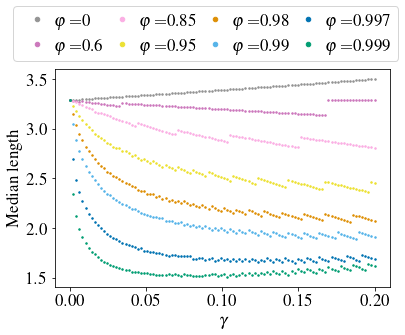

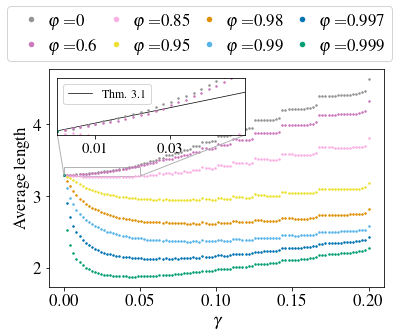

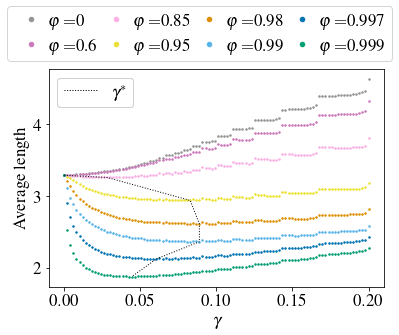

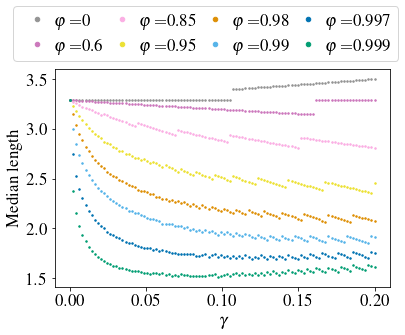

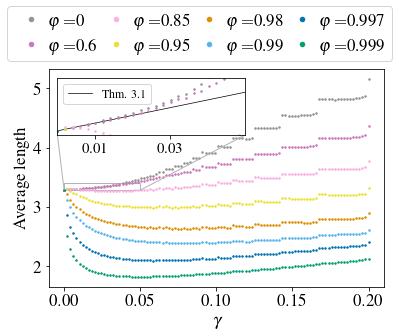

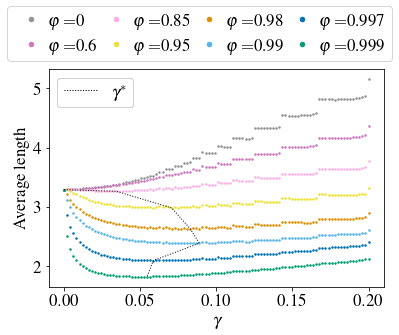

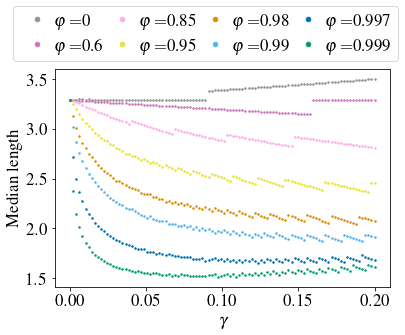

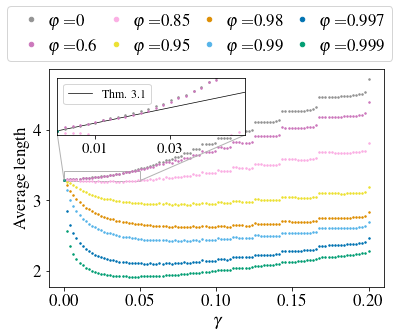

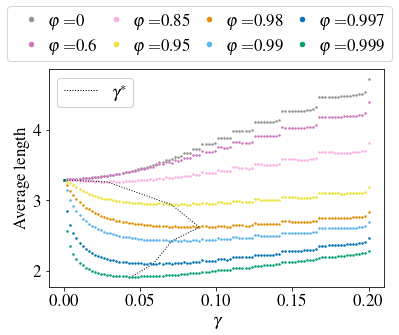

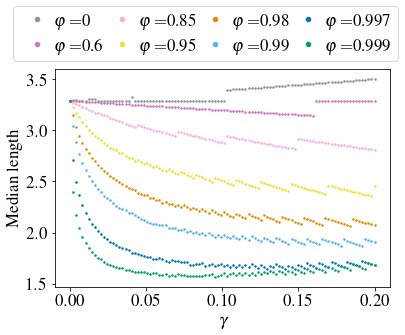

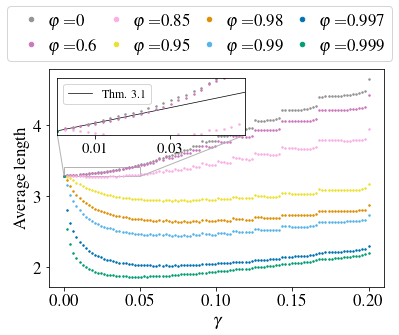

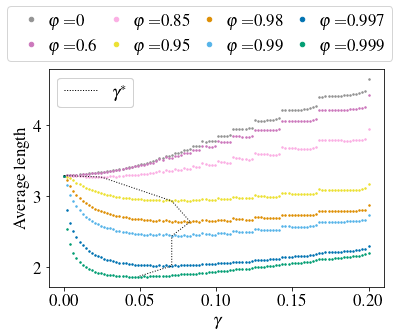

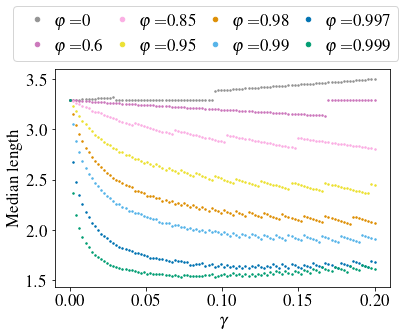

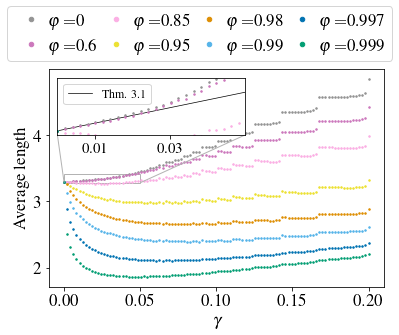

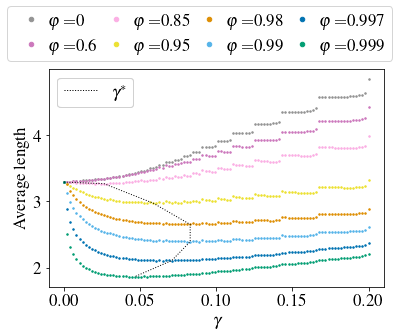

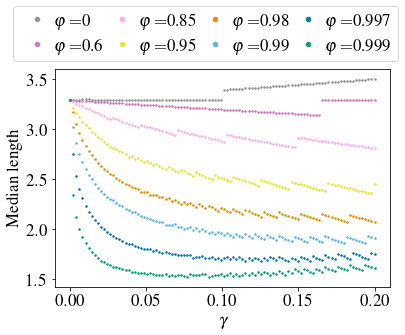

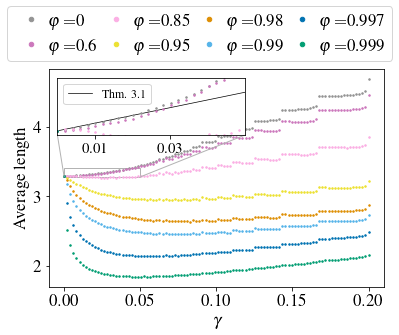

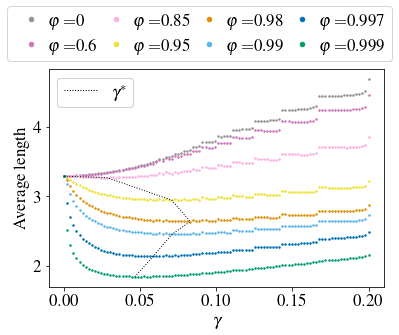

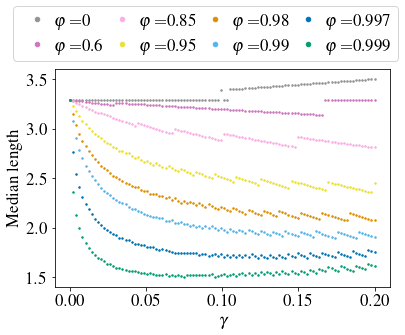

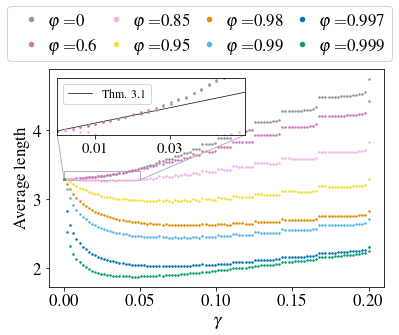

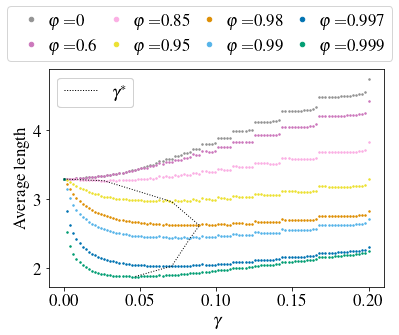

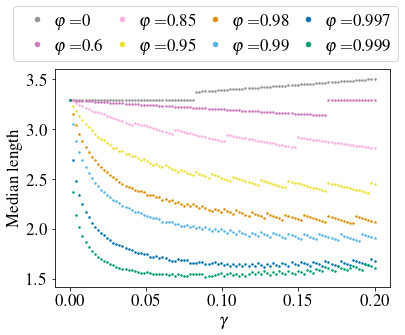

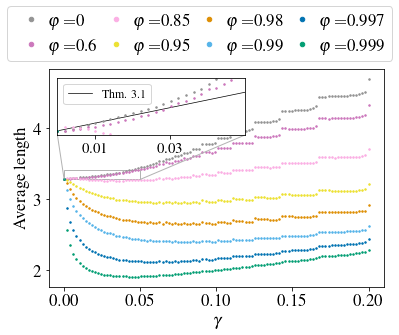

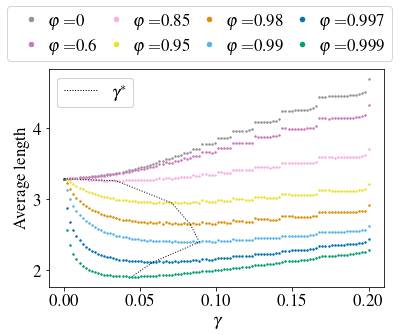

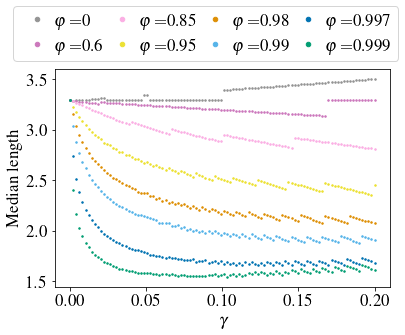

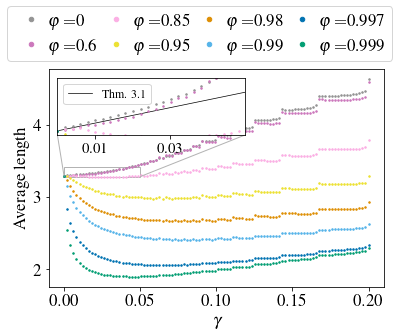

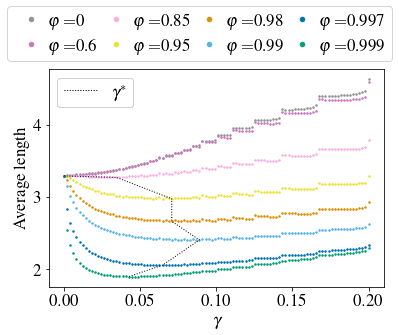

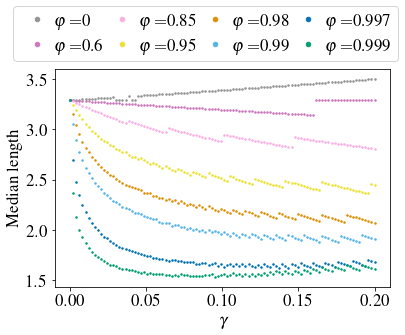

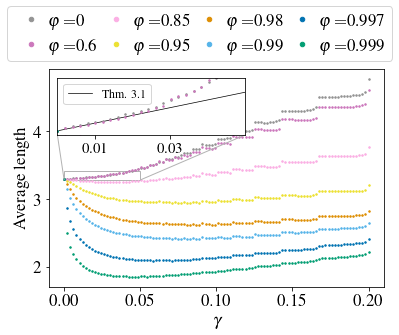

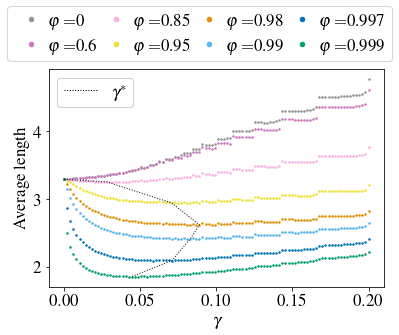

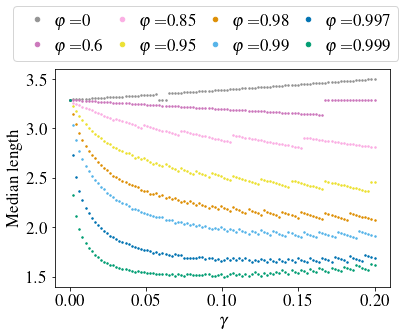

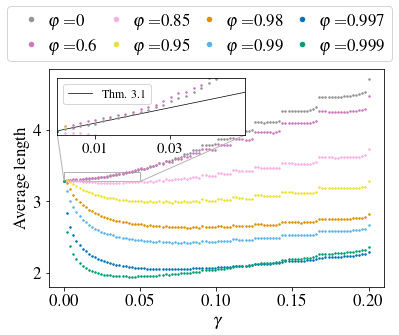

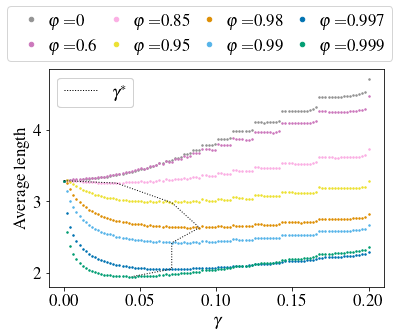

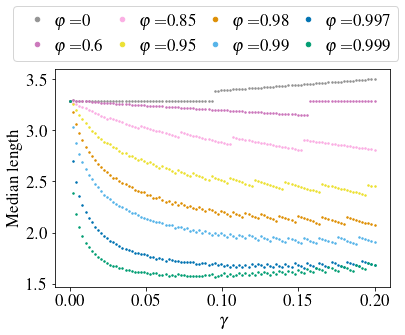

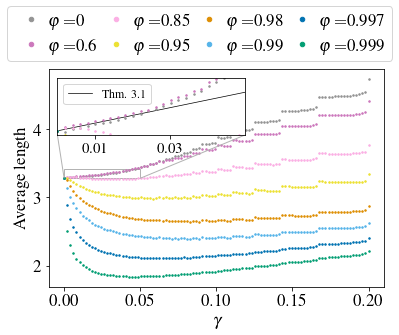

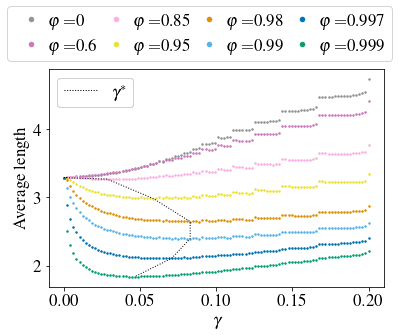

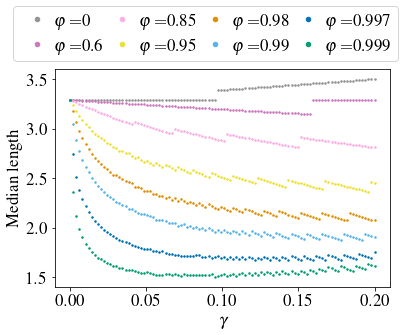

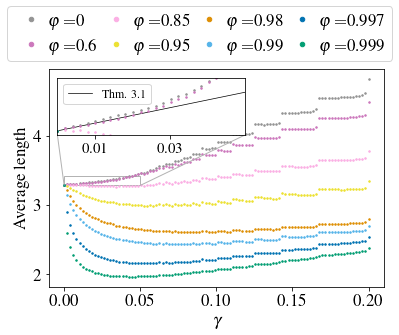

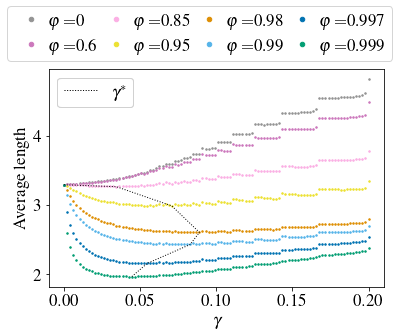

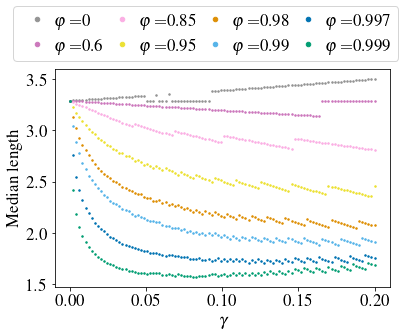

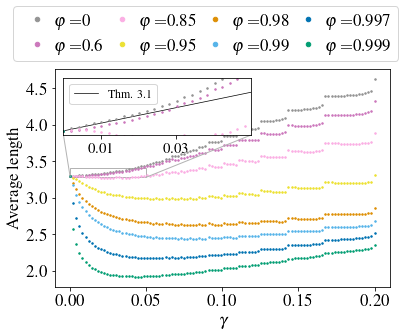

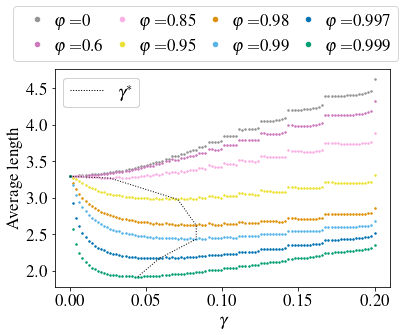

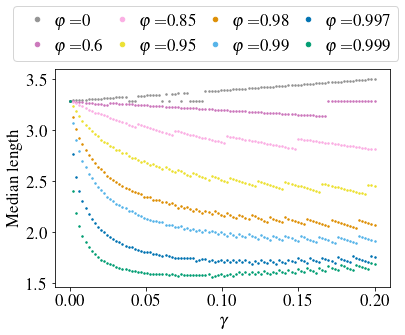

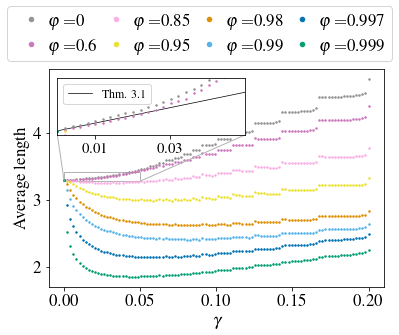

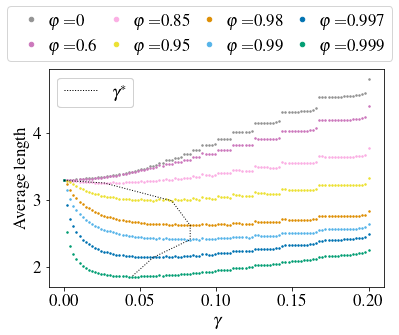

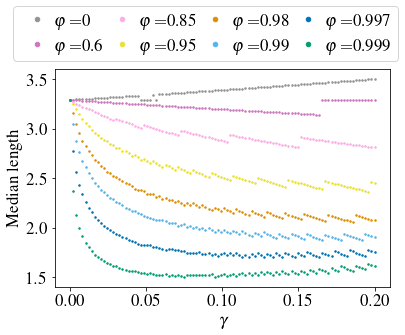

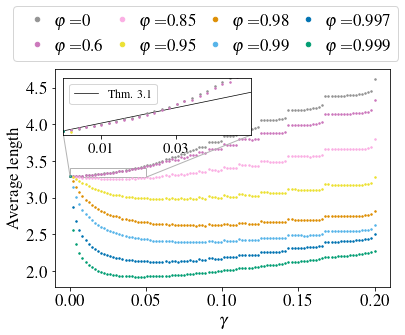

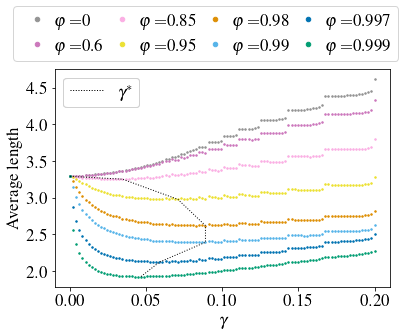

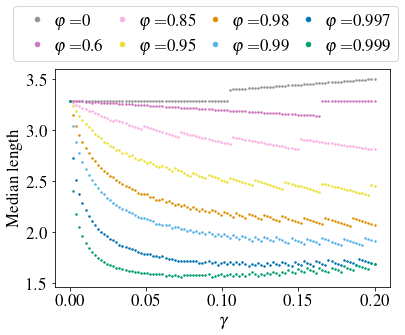

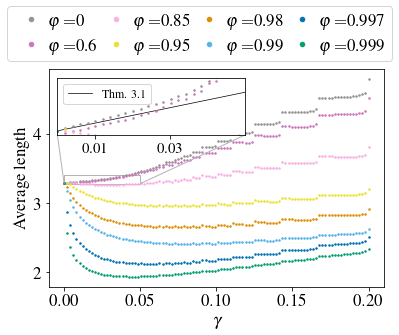

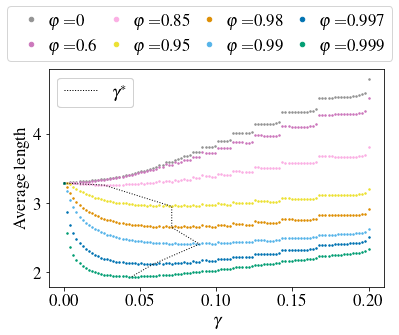

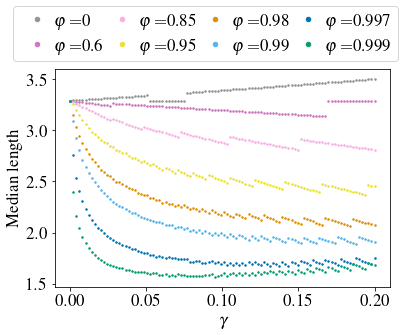

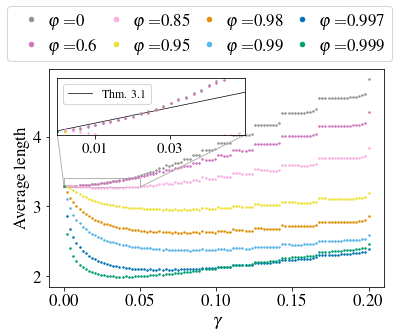

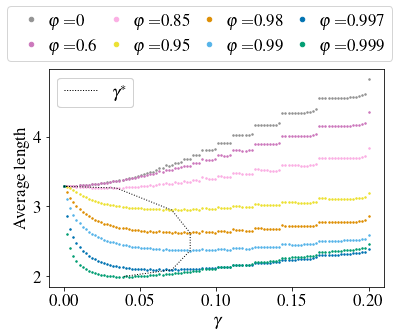

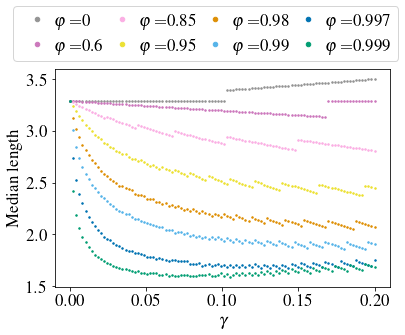

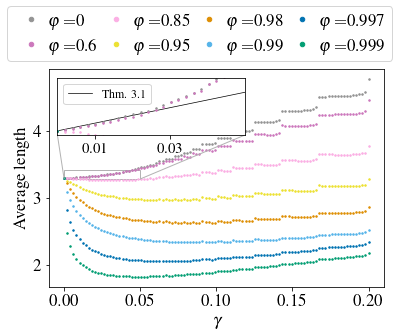

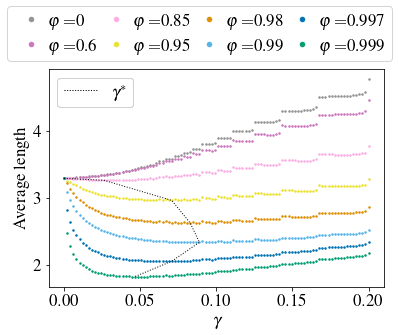

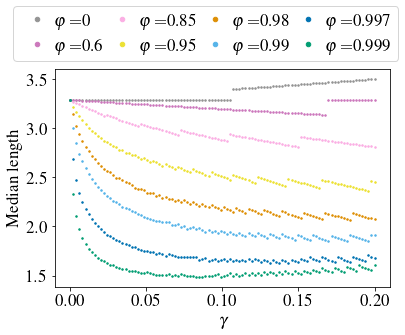

In [6]:
name = 'results/ar_numerical/aci_theory_ar_fixed_var_1_proj_stats_all_imputed_seed0.pkl'
with open(name,'rb') as f:
    results_stats = pickle.load(f)
gammas = results_stats['gammas']
phis = results_stats['phis']
array_gammas_opt = np.empty((len(seeds), len(phis)))
array_gammas_opt_med = np.empty((len(seeds), len(phis)))

for ids,seed in enumerate(seeds):
    
    # read results
    name = 'results/ar_numerical/aci_theory_ar_fixed_var_1_proj_stats_all_imputed_seed%d.pkl'%seed
    with open(name,'rb') as f:
        results_stats = pickle.load(f)
        
    # save values
    empirical_expectation_lengths_proj = results_stats['emp_exp_lengths_proj']
    empirical_median_lengths = results_stats['emp_med_lengths_proj']
    # compute optimal values and store them
    length_opt = np.min(empirical_expectation_lengths_proj, axis=1)
    gammas_opt = gammas[np.argmin(empirical_expectation_lengths_proj, axis=1)]
    array_gammas_opt[ids,:] = gammas_opt
    gammas_opt_med = gammas[np.argmin(empirical_median_lengths, axis=1)]
    array_gammas_opt_med[ids,:] = gammas_opt_med
    
    # plot average length
    fig, ax = plt.subplots(1,1)
    axins = inset_axes(ax,2.6,0.8,loc='upper left')
    axins.plot(gammas,empirical_expectation_lengths_proj[phis.index(0),0]+qseconde*gammas/2*alpha*(1-alpha), '-',color='k',
               linewidth=0.7,label='Thm. 3.1')
    for idp, phi in enumerate(phis):
        ax.plot(gammas, empirical_expectation_lengths_proj[idp,:],'.',markersize=3,label=r'$\varphi =$'+str(round(phi,3)), 
                 color=colors[idp])
        axins.plot(gammas, empirical_expectation_lengths_proj[idp,:],'.',markersize=3, 
                 color=colors[idp])
    ax.legend(mode='expand',bbox_to_anchor=(-0.15,1,1.2,0.2),ncol=4,markerscale=3,handletextpad=10**(-16))
    ax.set_xlabel(r'$\gamma$')
    ax.set_ylabel('Average length')
    axins.set_xlim(0,0.05)
    axins.set_ylim(3.28,3.41)
    axins.set_xticks([0.01,0.03])
    axins.set_xticklabels(['0.01','0.03'])
    axins.tick_params(axis='x', labelsize=15)
    axins.legend(loc='upper left',fontsize=12)
    axins.set_yticks([])
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.7")
    plt.savefig('plots/ar_numerical/numerical_ar_lengths_seed%d.pdf'%seed,bbox_inches='tight', dpi=300)
    plt.show()
    
    # plot average length with curve of minimum
    for idp, phi in enumerate(phis):
        plt.plot(gammas, empirical_expectation_lengths_proj[idp,:],'.',markersize=3,label=r'$\varphi =$'+str(round(phi,3)), 
                 color=colors[idp])
    legend1 = plt.legend(mode='expand',bbox_to_anchor=(-0.15,1,1.2,0.2),ncol=4,markerscale=3,handletextpad=10**(-16))
    line, = plt.plot(gammas_opt,length_opt,color='k',linestyle=':',linewidth=1,label=r'$\gamma^*$')#colors_blindness[3]
    legend2 = plt.legend(handles=[line],loc='upper left')
    plt.gca().add_artist(legend1)
    plt.gca().add_artist(legend2)
    plt.xlabel(r'$\gamma$')
    plt.ylabel('Average length')
    plt.savefig('plots/ar_numerical/numerical_ar_lengths_with_gamma_opt_seed%d.pdf'%seed,bbox_inches='tight', dpi=300)
    plt.show()
    
    # plot median length
    for idp, phi in enumerate(phis):
        plt.plot(gammas, empirical_median_lengths[idp,:],'.',markersize=3,label=r'$\varphi =$'+str(round(phi,3)), 
                 color=colors[idp])
    plt.legend(mode='expand',bbox_to_anchor=(-0.15,1,1.2,0.2),ncol=4,markerscale=3,handletextpad=10**(-16))
    plt.xlabel(r'$\gamma$')
    plt.ylabel('Median length')
    plt.savefig('plots/ar_numerical/numerical_ar_median_lengths_seed%d.pdf'%seed,bbox_inches='tight', dpi=300)
    plt.show()

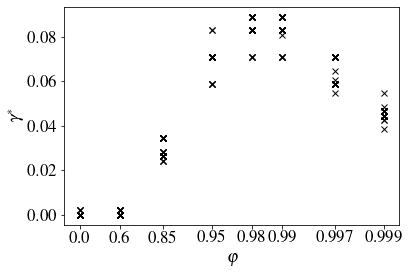

In [7]:
plt.plot(list(np.log(1-np.array(phis)))*(len(seeds)),array_gammas_opt.reshape(-1),'x',color='k')
plt.xticks(np.log(1-np.array(phis)),np.round(phis,3))
plt.gca().invert_xaxis()
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\gamma^*$')
plt.savefig('plots/ar_numerical/numerical_ar_gamma_opt.pdf',bbox_inches='tight', dpi=300)
plt.show()

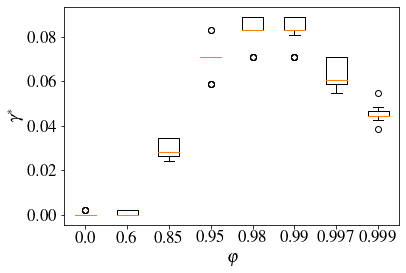

In [8]:
plt.boxplot(array_gammas_opt)
plt.xticks(np.arange(1,len(phis)+1),np.round(phis,3))
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\gamma^*$')
plt.savefig('plots/ar_numerical/numerical_ar_gamma_opt_boxplot.pdf',bbox_inches='tight', dpi=300)
plt.show()

In [9]:
array_gammas_opt_by_phis = array_gammas_opt.T
to_plot = dict.fromkeys(phis)
for idp,phi in enumerate(phis):
    to_plot[phi] = {'values':[],'frequency':[]}
    to_plot[phi]['values'] = np.unique(array_gammas_opt_by_phis[idp], return_counts=True)[0]
    to_plot[phi]['frequency'] = np.unique(array_gammas_opt_by_phis[idp], return_counts=True)[1]

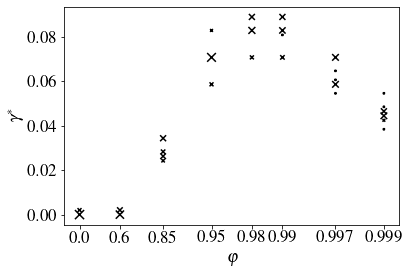

In [10]:
grey_scale = False
for idp,phi in enumerate(phis):
    nb_values = len(to_plot[phi]['values'])
    if grey_scale:
        alpha_min = 0.2
        alpha_max = 1
        alphas = alpha_min+(to_plot[phi]['frequency']/nb_seed_cluster)*(alpha_max-alpha_min)
        colors = np.zeros((nb_values,4))
        # the fourth column needs to be your alphas
        colors[:, 3] = alphas
        plt.scatter(np.full(nb_values,np.log(1-np.array(phi))),to_plot[phi]['values'],marker='x',
                    c=colors)
    else:
        ref_size = 100
        plt.scatter(np.full(nb_values,np.log(1-np.array(phi))),to_plot[phi]['values'],marker='x',
                    c='k',s=ref_size*to_plot[phi]['frequency']/nb_seed_cluster)
plt.xticks(np.log(1-np.array(phis)),np.round(phis,3))
plt.gca().invert_xaxis()
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\gamma^*$')
if grey_scale:
    name_plot = 'numerical_ar_gamma_opt_greys.pdf'
else:
    name_plot = 'numerical_ar_gamma_opt_sizes.pdf'
plt.savefig('plots/ar_numerical/'+name_plot,bbox_inches='tight', dpi=300)
plt.show()

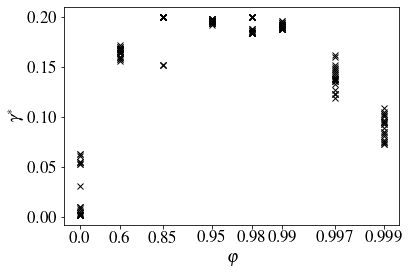

In [11]:
plt.plot(list(np.log(1-np.array(phis)))*(len(seeds)),array_gammas_opt_med.reshape(-1),'x',color='k')
plt.xticks(np.log(1-np.array(phis)),np.round(phis,3))
plt.gca().invert_xaxis()
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\gamma^*$')
plt.savefig('plots/ar_numerical/numerical_ar_gamma_opt_med.pdf',bbox_inches='tight', dpi=300)
plt.show()

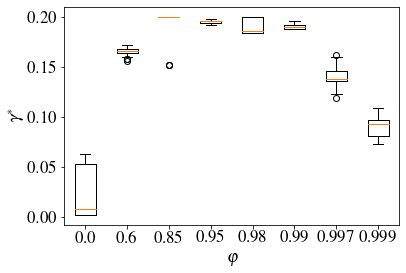

In [12]:
plt.boxplot(array_gammas_opt_med)
plt.xticks(np.arange(1,len(phis)+1),np.round(phis,3))
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\gamma^*$')
plt.savefig('plots/ar_numerical/numerical_ar_gamma_opt_med_boxplot.pdf',bbox_inches='tight', dpi=300)
plt.show()

In [13]:
array_gammas_opt_med_by_phis = array_gammas_opt_med.T
to_plot_med = dict.fromkeys(phis)
for idp,phi in enumerate(phis):
    to_plot_med[phi] = {'values':[],'frequency':[]}
    to_plot_med[phi]['values'] = np.unique(array_gammas_opt_med_by_phis[idp], return_counts=True)[0]
    to_plot_med[phi]['frequency'] = np.unique(array_gammas_opt_med_by_phis[idp], return_counts=True)[1]

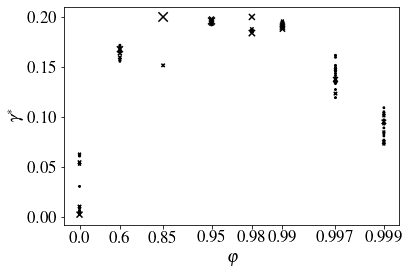

In [14]:
grey_scale = False
for idp,phi in enumerate(phis):
    nb_values = len(to_plot_med[phi]['values'])
    if grey_scale:
        alpha_min = 0.2
        alpha_max = 1
        alphas = alpha_min+(to_plot_med[phi]['frequency']/nb_seed_cluster)*(alpha_max-alpha_min)
        colors = np.zeros((nb_values,4))
        # the fourth column needs to be your alphas
        colors[:, 3] = alphas
        plt.scatter(np.full(nb_values,np.log(1-np.array(phi))),to_plot_med[phi]['values'],marker='x',
                    c=colors)
    else:
        ref_size = 100
        plt.scatter(np.full(nb_values,np.log(1-np.array(phi))),to_plot_med[phi]['values'],marker='x',
                    c='k',s=ref_size*to_plot_med[phi]['frequency']/nb_seed_cluster)
plt.xticks(np.log(1-np.array(phis)),np.round(phis,3))
plt.gca().invert_xaxis()
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\gamma^*$')
if grey_scale:
    name_plot = 'numerical_ar_gamma_opt_med_greys.pdf'
else:
    name_plot = 'numerical_ar_gamma_opt_med_sizes.pdf'
plt.savefig('plots/ar_numerical/'+name_plot,bbox_inches='tight', dpi=300)
plt.show()